## Overview

The dataset you'll be working with contains results from an airline passenger satisfaction survey.

### Key Questions
1. Can you predict passenger satisfaction?
2. What factors are associated with passenger satisfaction?

### Variables
- **Gender**: Gender of the passenger (Female, Male)
- **Customer Type**: The customer type (Loyal customer, disloyal customer)
- **Age**: Passenger age
- **Type of Travel**: Purpose of the flight (Personal Travel, Business Travel)
- **Class**: Travel class (Business, Eco, Eco Plus)
- **Flight Distance**: Distance of the flight
- **Inflight Wifi Service**: Satisfaction level (0 = Not Applicable; 1–5)
- **Departure/Arrival Time Convenient**: Satisfaction level
- **Ease of Online Booking**: Satisfaction level
- **Gate Location**: Satisfaction level
- **Food and Drink**: Satisfaction level
- **Online Boarding**: Satisfaction level
- **Seat Comfort**: Satisfaction level
- **Inflight Entertainment**: Satisfaction level
- **On-Board Service**: Satisfaction level
- **Leg Room Service**: Satisfaction level
- **Baggage Handling**: Satisfaction level
- **Check-In Service**: Satisfaction level
- **Inflight Service**: Satisfaction level
- **Cleanliness**: Satisfaction level
- **Departure Delay in Minutes**
- **Arrival Delay in Minutes**
- **Satisfaction**: Overall airline satisfaction (Satisfaction, Neutral or Dissatisfaction)

> **Note:** You are provided two data files, which should be combined into a single dataset for your analysis.

---

## Project Specifications

Although this is an advanced machine learning course, your work will be evaluated on the following:

- Data preparation and preprocessing
- Exploratory data analysis (EDA)
- Modeling efforts, including model comparisons and interpretations
- Communication
- Although this is an advanced machine learning course, your work will be evaluated on the following:

You should also include a reflective discussion on the data itself, including:

- Possible sources and limitations of this kind of survey data
- Specific criticisms or issues you identify in the dataset or survey
- Suggestions for improving future survey design
- Thoughts on generalizability: Who can this analysis apply to? How useful is it to an airline?

In [79]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# Modeling Imports
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## The Data

The dataset used in this project comes from two separate CSV files containing results from an airline passenger satisfaction survey. Each row represents an individual passenger's responses regarding their flight experience, including ratings for services such as inflight entertainment, food and drink, check-in, and cleanliness.

The two files were successfully combined into one dataset, as they share the same structure and variable names. After merging, the combined dataset includes all available responses for further analysis.

This dataset will serve as the foundation for our exploratory data analysis (EDA), feature engineering, and modeling efforts.


In [80]:
# Load the two datasets
data1 = pd.read_csv("Data/data1.csv").drop(columns = ['Unnamed: 0'])
data2 = pd.read_csv("Data/data2.csv").drop(columns = ['Unnamed: 0'])

In [81]:
# Check column names
print("data1 columns:")
print(data1.columns)

print("\ndata2 columns:")
print(data2.columns)

# Sanity Check if the columns are exactly the same (same names, same order)
columns_match = list(data1.columns) == list(data2.columns)
print(f"\nDo the columns match exactly (same names and order)? {columns_match}")

# Sanity Check for differences in column names if not an exact match
if not columns_match:
    print("\nColumns only in data1:", set(data1.columns) - set(data2.columns))
    print("Columns only in data2:", set(data2.columns) - set(data1.columns))

data1 columns:
Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

data2 columns:
Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',

In [82]:
# Combine them into a single DataFrame
df = pd.concat([data1, data2], ignore_index=True)

# Quick shape check
print(f"Combined dataset shape: {df.shape}")

# Preview the data
df.head()

Combined dataset shape: (129880, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [84]:
df.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,64940.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN
std,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32470.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64940.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97410.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


## Exploratory Data Analysis (EDA)

Before diving into modeling, it's important to explore the structure, contents, and distributions of the dataset. Our goal is to understand:

- The balance of our target variable (`satisfaction`)
- The nature of numeric vs. categorical variables
- Potential outliers or skewness (e.g., delay times, flight distance)
- Any missing or irregular data
- The relationships between features and satisfaction

There are 129,880 survey responses and 24 columns. Most columns are fully populated, but Arrival Delay has a small number of missing values.

We break down the dataset below by data types, class balance, distributions, and correlations.


In [85]:
# Column types summary
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numeric Columns ({len(numeric_cols)}): {numeric_cols}")

Categorical Columns (5): ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Numeric Columns (19): ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


### Class Balance of Target Variable

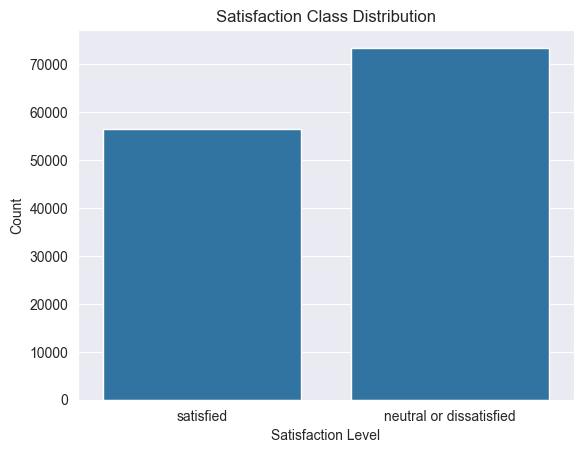

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='satisfaction')
plt.title("Satisfaction Class Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

### Missing Values Check

In [87]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    print("Missing values:")
    print(missing)
else:
    print("No missing values detected.")

Missing values:
Arrival Delay in Minutes    393
dtype: int64


### Summary Stats for Delays

In [88]:
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129487.000000
mean,14.713713,15.091129
std,38.071126,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


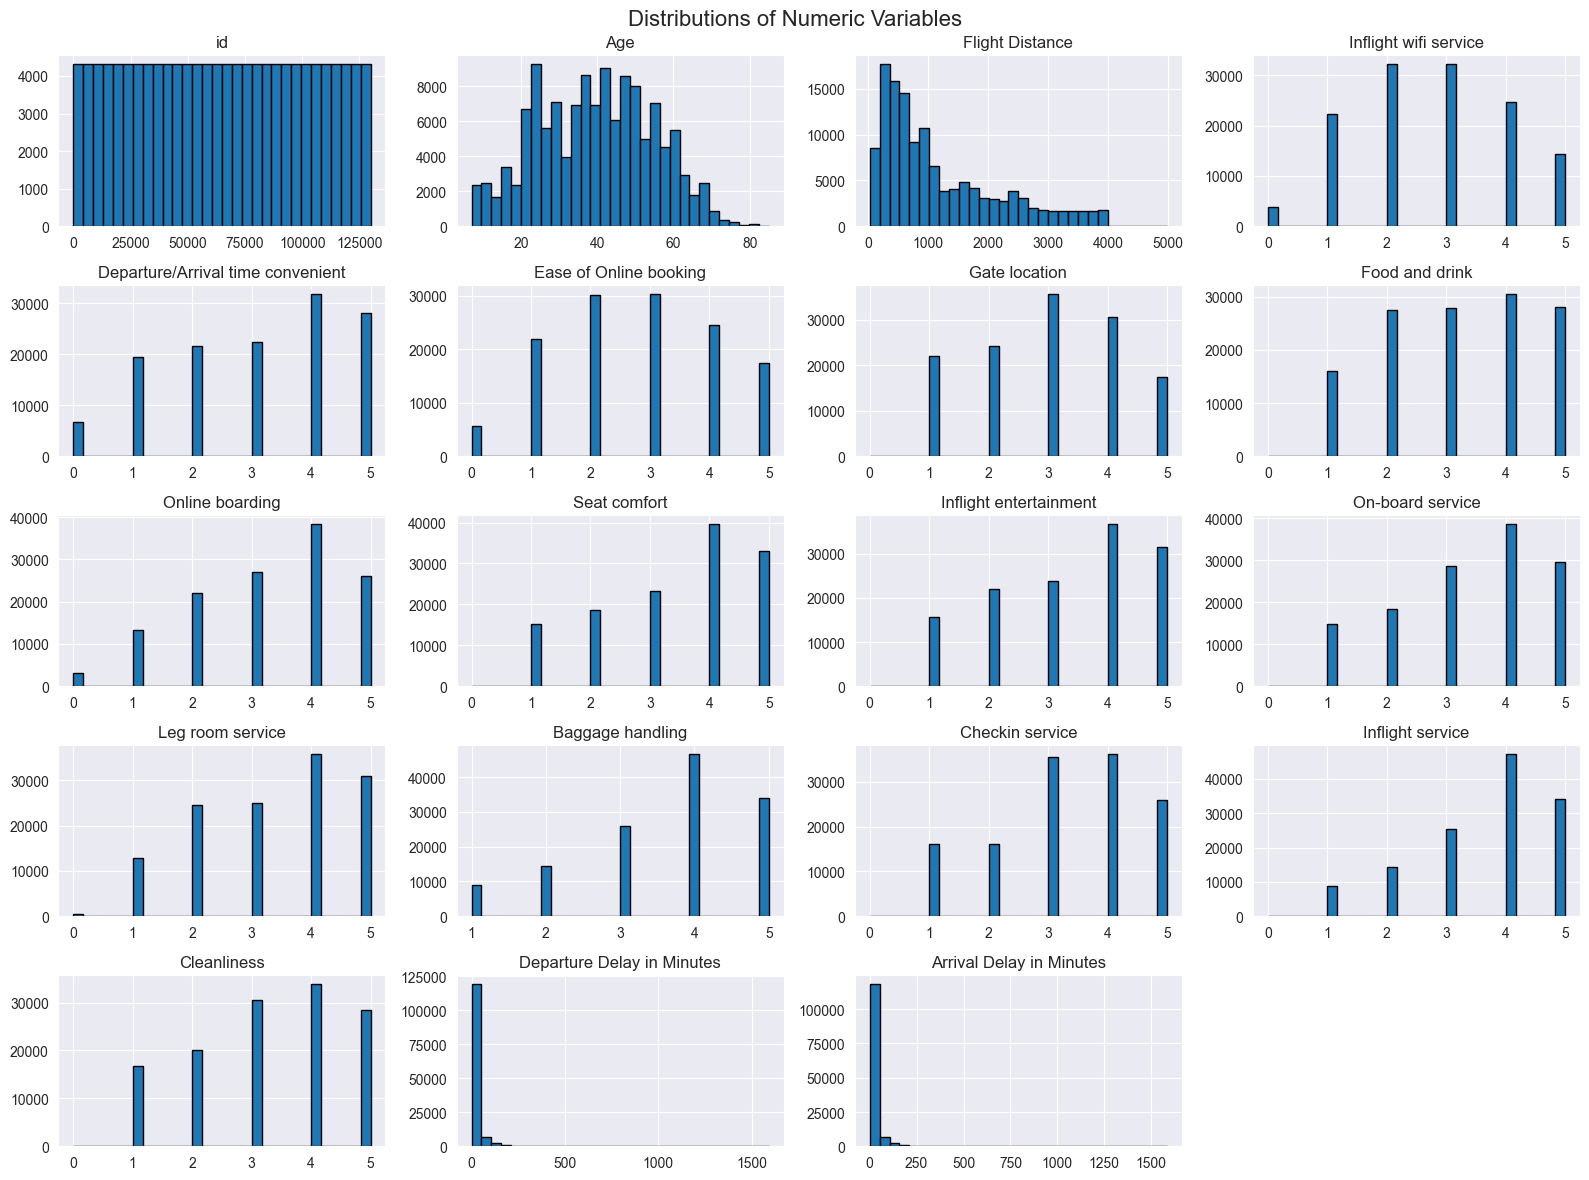

In [89]:
df[numeric_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()

#### Class Distribution

The target variable `satisfaction` is imbalanced, with more passengers labeled as **neutral or dissatisfied** than **satisfied**. This may influence model training and should be addressed or monitored, potentially using stratified sampling or class-balancing techniques during modeling.

#### Numeric Feature Distributions

Most satisfaction-related ratings (e.g., inflight wifi service, seat comfort, food and drink) are scored on a **1–5 Likert scale** and are relatively well-distributed. Features like `online boarding`, `cleanliness`, and `leg room service` show higher concentrations toward higher scores, which may signal passengers tend to rate these features positively.

Notable patterns include:

- **Flight Distance**: Right-skewed, with most flights under 2000 miles and a long tail extending beyond 4000 miles.
- **Delays**: Both `Departure Delay in Minutes` and `Arrival Delay in Minutes` are heavily right-skewed with many zero values, indicating most flights were on time or only slightly delayed.
- **Age**: Roughly bell-shaped, with most passengers in the 20–60 age range.

These insights help inform feature engineering and guide us toward which features may drive satisfaction in the modeling phase.


### Investigating Missing Values in Arrival Delay

In [90]:
# Create a flag for missing arrival delay
df['arrival_missing'] = df['Arrival Delay in Minutes'].isnull()

# Compare missing vs. non-missing for key indicators
missing_summary = df.groupby('arrival_missing')[[
    'Departure Delay in Minutes',
    'Flight Distance',
    'satisfaction'
]].describe()

missing_summary

Departure Delay in Minutes                                  \
                                     count       mean        std  min  25%   
arrival_missing                                                              
False                             129487.0  14.643385  37.932867  0.0  0.0   
True                                 393.0  37.885496  66.213936  0.0  0.0   

                                   Flight Distance                           \
                 50%   75%     max           count         mean         std   
arrival_missing                                                               
False            0.0  12.0  1592.0        129487.0  1190.210662  997.560954   
True             8.0  48.0   530.0           393.0  1225.152672  961.635757   

                                                     
                  min    25%    50%     75%     max  
arrival_missing                                      
False            31.0  414.0  844.0  1744.0  4983.0  
True             77.0  459.0  927.0  1750.0  3981.0

### Understanding Missing Values in `Arrival Delay in Minutes`

There are 393 rows where `Arrival Delay in Minutes` is missing. To better understand what these missing values represent, we compared them to the rest of the dataset across key numeric features:

|                        | Not Missing (`False`) | Missing (`True`) |
|------------------------|-----------------------|------------------|
| **Count**              | 129,487               | 393              |
| **Departure Delay (mean)** | 14.64                 | 37.89            |
| **Departure Delay (median)** | 0.0                  | 8.0              |
| **Departure Delay (75%)**   | 12.0                 | 48.0             |
| **Max Departure Delay**     | 1,592                | 530              |
| **Flight Distance (mean)** | 1,190.21             | 1,225.15         |

**Key Observations:**
- The **median departure delay** for missing rows is **8 minutes**, compared to **0** for non-missing rows.
- **Departure delays are longer on average** when `Arrival Delay` is missing.
- The **flight distance distributions** are very similar, suggesting that route length is not related to the missingness.
- These findings suggest that the missing arrival delay values are **not simply on-time flights**. In fact, many have **notable departure delays**.

**Interpretation**: These rows may represent **flights where arrival delay wasn’t recorded**, despite moderate departure delays. It's possible this is due to a logging issue or incomplete data transfer from operational systems.


In [91]:
# Satisfaction levels in rows with missing Arrival Delay
df[df['arrival_missing'] == True]['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.577608
satisfied                  0.422392
Name: proportion, dtype: float64

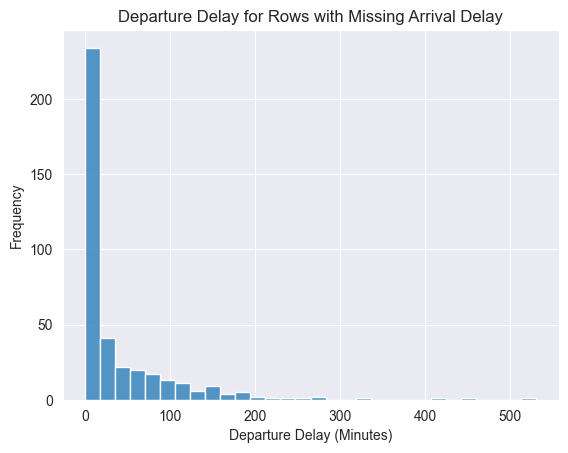

In [92]:
sns.histplot(
    df[df['arrival_missing']]['Departure Delay in Minutes'],
    bins=30,
    kde=False
)
plt.title("Departure Delay for Rows with Missing Arrival Delay")
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Frequency")
plt.show()

### Additional Insights on Missing Arrival Delay Values

The histogram above shows the distribution of Departure Delay for rows where Arrival Delay is missing:

- The vast majority of these rows still have **non-zero departure delays**, many of which are substantial (over 100 minutes).
- This contradicts the idea that missing arrival delays simply reflect on-time flights.

Additionally, the satisfaction distribution for these 393 rows is:

| Satisfaction Level         | Proportion |
|----------------------------|------------|
| Neutral or Dissatisfied    | 57.8%      |
| Satisfied                  | 42.2%      |

This roughly mirrors the overall dataset distribution, indicating that missing arrival delays are **not uniquely associated with unhappy passengers**.

**Remarks**: These rows likely represent operational inconsistencies in data capture rather than a distinct segment of the population. We may either:
- Impute the values using a model (e.g., based on departure delay),
- Replace missing values with a flag (e.g., `-1`) to preserve the signal,
- Or drop them if modeling shows no adverse effect.

### Exploring Relationships Between Features and Satisfaction

#### Satisfaction by Gender

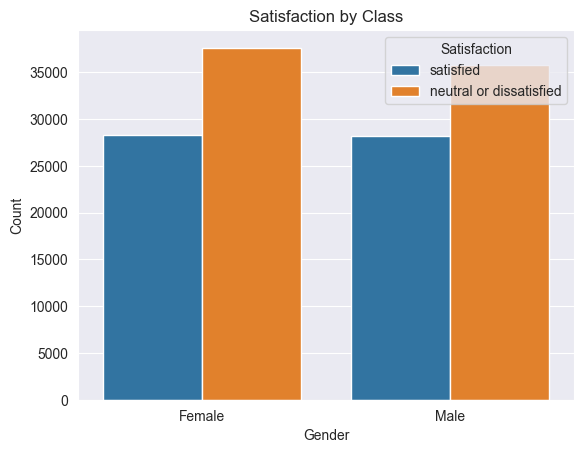

In [93]:
sns.countplot(data=df, x='Gender', hue='satisfaction')
plt.title("Satisfaction by Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Satisfaction")

#### Satisfaction by Class

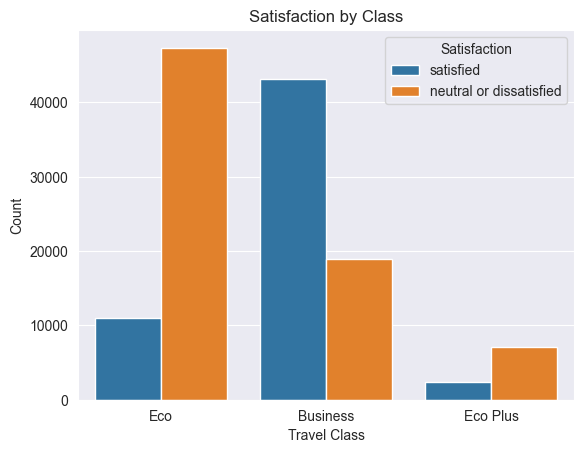

In [94]:
sns.countplot(data=df, x='Class', hue='satisfaction')
plt.title("Satisfaction by Class")
plt.xlabel("Travel Class")
plt.ylabel("Count")
plt.legend(title="Satisfaction")
plt.show()

#### Satisfaction by Type of Travel

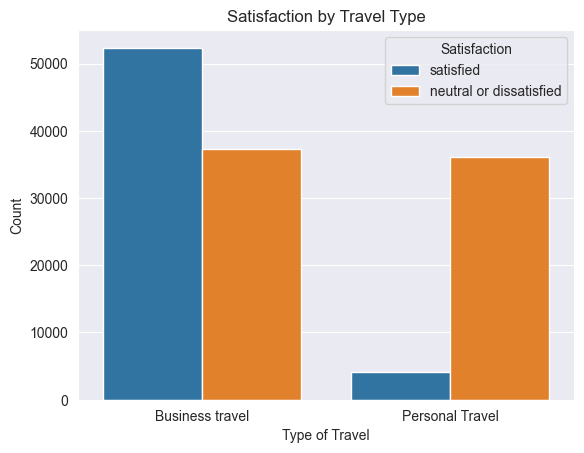

In [95]:
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')
plt.title("Satisfaction by Travel Type")
plt.xlabel("Type of Travel")
plt.ylabel("Count")
plt.legend(title="Satisfaction")
plt.show()

#### Satisfaction by Customer Type

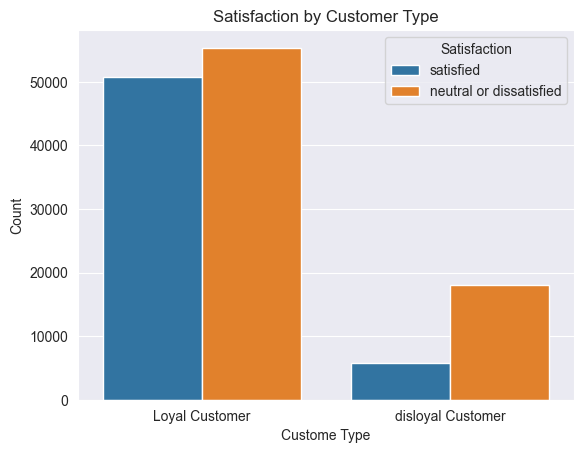

In [96]:
sns.countplot(data=df, x='Customer Type', hue='satisfaction')
plt.title("Satisfaction by Customer Type")
plt.xlabel("Custome Type")
plt.ylabel("Count")
plt.legend(title="Satisfaction")
plt.show()

#### Travel Class

- Passengers in **Business class** report the highest satisfaction levels by a large margin.
- **Economy passengers** are overwhelmingly more likely to report dissatisfaction.
- **Eco Plus** passengers show mixed satisfaction, leaning slightly toward neutral or dissatisfied.

#### Type of Travel

- **Business travelers** are significantly more likely to report satisfaction than personal travelers.
- Personal travel is strongly associated with dissatisfaction, suggesting expectations may not be met for these passengers.

#### Customer Type

- **Loyal customers** have a much higher chance of being satisfied than disloyal customers.
- Among **disloyal customers**, dissatisfaction dominates.
- This highlights customer loyalty as a strong predictor of satisfaction, potentially reflecting both experience and expectations.

These categorical patterns will inform feature selection and model interpretation moving forward. Business class, customer type, and travel purpose are strong candidates for variables with predictive power.


## Feature Engineering

### Exploring the Relationship Between Departure and Arrival Delays

To assess whether it's reasonable to use a linear model to impute missing arrival delays, we can plot Departure Delay against Arrival Delay.

Key observations:

- There is a **strong positive linear relationship** — as departure delay increases, arrival delay tends to increase as well.
- This relationship holds consistently across both satisfaction groups.
- The variance is wider for larger delays, but the trend is visually linear for most of the range.

Given this structure, a **simple linear regression model** is a justified and interpretable way to estimate missing arrival delay values.

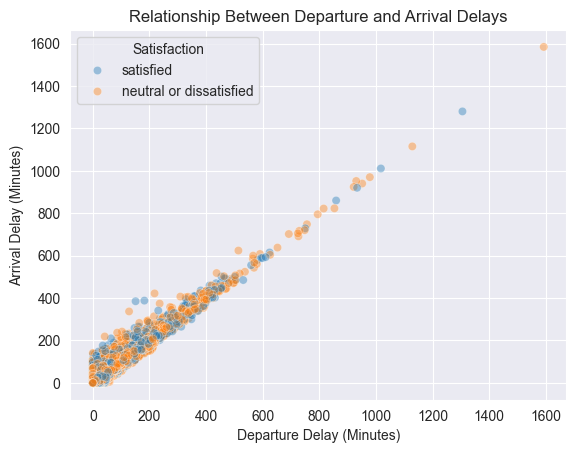

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to rows where both values are present
delay_plot_df = df[df['Arrival Delay in Minutes'].notnull()]

sns.scatterplot(
    data=delay_plot_df,
    x='Departure Delay in Minutes',
    y='Arrival Delay in Minutes',
    hue='satisfaction',
    alpha=0.4
)

plt.title("Relationship Between Departure and Arrival Delays")
plt.xlabel("Departure Delay (Minutes)")
plt.ylabel("Arrival Delay (Minutes)")
plt.legend(title="Satisfaction")
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression

# Subsets
known = df[df['Arrival Delay in Minutes'].notnull()]
missing = df[df['Arrival Delay in Minutes'].isnull()]

# Features: start with the most relevant
features = ['Departure Delay in Minutes', 'Flight Distance']

# Define X and y
X_train = known[features]
y_train = known['Arrival Delay in Minutes']

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict for missing rows
X_missing = missing[features]
predicted_values = lr.predict(X_missing)

# Fill missing values
df.loc[df['Arrival Delay in Minutes'].isnull(), 'Arrival Delay in Minutes'] = predicted_values

# Drop arrival_missing flag since no longer needed
df.drop(columns='arrival_missing', inplace=True, errors='ignore')

#### Linear Regression-Based Imputation

As mentioned above, to preserve signal and interpretability, we imputed missing values in Arrival Delay using a **linear regression model**.

- The model was trained using rows with non-missing arrival delay values.
- Predictor features included Departure Delay in Minutes and Flight Distance.
- The predicted values were used to fill in the missing entries, preserving realistic variance rather than inserting a fixed placeholder.

In [99]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Delay Feature Engineering

To enhance interpretability and reduce the effect of outliers in delay times, we created:
- A `delay_difference` feature, defined as arrival delay minus departure delay.
- Binned versions of both `Departure Delay` and `Arrival Delay`, grouped into four categories:
  - **On time** (0 minutes)
  - **Slight delay** (1–15 minutes)
  - **Moderate delay** (16–60 minutes)
  - **Major delay** (>60 minutes)

These binned features help us better communicate how delay severity affects passenger satisfaction, while `delay_difference` captures whether the airline made up or lost time in the air.


In [100]:
df['delay_difference'] = df['Arrival Delay in Minutes'] - df['Departure Delay in Minutes']
df['recovered_time'] = (df['delay_difference'] < 0).astype(int)

# Define bin edges and labels
delay_bins = [-1, 0, 15, 60, df['Departure Delay in Minutes'].max()]
delay_labels = ['On time', 'Slight delay', 'Moderate delay', 'Major delay']

# Apply binning
df['departure_delay_bin'] = pd.cut(df['Departure Delay in Minutes'], bins=delay_bins, labels=delay_labels)
df['arrival_delay_bin'] = pd.cut(df['Arrival Delay in Minutes'], bins=delay_bins, labels=delay_labels)

In [101]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Senior', 'Elder'])

### Interaction Features: `class_loyalty` and `loyalty_travel_type`

To better model the context of each passenger’s experience, we created two interaction features combining travel class, loyalty, and travel purpose:

#### 1. `class_loyalty`
Created by combining `Class` and `Customer Type`:

#### 2. `loyalty_travel_type`
Created by combining `Customer Type` and `Type of Travel`:

This captures how satisfaction shifts when loyalty is tested in different travel contexts:

- Are loyal customers more forgiving during personal travel?
- Are disloyal customers more dissatisfied on business trips?

These interaction terms may help the model identify conditional effects that individual variables alone might miss.

In [102]:
df['class_loyalty'] = df['Class'] + '_' + df['Customer Type']
df['loyalty_travel_type'] = df['Customer Type'] + '_' + df['Type of Travel']

### Pre-Flight and In-Flight Scores

To better distinguish different stages of the passenger journey, we can separate service ratings into:

- **Pre-flight score**: Based on online booking, gate location, boarding process, check-in, and timing convenience.
- **In-flight score**: Based on inflight Wi-Fi, food, entertainment, seat comfort, onboard staff, legroom, cleanliness, and baggage handling.

These two summary features help isolate which part of the travel experience has the strongest influence on satisfaction, and may help in building more interpretable and actionable models.

In [103]:
pre_flight_cols = [
    'Ease of Online booking',
    'Gate location',
    'Online boarding',
    'Checkin service',
    'Departure/Arrival time convenient'
]
df['pre_flight_score'] = df[pre_flight_cols].mean(axis=1)

in_flight_cols = [
    'Inflight wifi service',
    'Food and drink',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Inflight service',
    'Cleanliness'
]
df['in_flight_score'] = df[in_flight_cols].mean(axis=1)

### Final Feature Sets

In [104]:
target = 'satisfaction'

# Binary encode target: 1 = satisfied, 0 = not satisfied
df[target] = (df[target] == 'satisfied').astype(int)

raw_features = ['Gender', 'Flight Distance', 'Customer Type', 'Class', 'Type of Travel']

raw_scores = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]


# Engineered features (complex models)
engineered_features = [
    'recovered_time', 'departure_delay_bin', 'arrival_delay_bin',
    'age_group'
]

engineered_interactions = ['class_loyalty', 'loyalty_travel_type']

engineered_scores = ['pre_flight_score', 'in_flight_score']

## Baseline Modeling

To evaluate and predict airline passenger satisfaction, we selected three baseline models that each bring a different strength to the analysis. Logistic Regression serves as a simple and interpretable benchmark. It allows us to understand the directional influence of individual features and is well-suited for drawing clear insights from categorical and numerical data.

Bagging Classifier was chosen as a natural next step, offering increased predictive stability by combining the outputs of multiple decision trees trained on different subsets of the data. This model helps reduce overfitting while still capturing nonlinear interactions.

Finally, Random Forest was included as a powerful and commonly used ensemble method. It extends the idea of bagging by introducing random feature selection at each split, which enhances diversity among trees and often leads to superior accuracy. Random Forest is particularly effective for tabular survey data where feature relationships may be complex or non-linear.

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

# Features
logreg_features = raw_features + raw_scores + engineered_features 

# Define predictors and target
X = df[logreg_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE
)

# Split features by type
binary_features = ['recovered_time'] if 'recovered_time' in logreg_features else []
cat_features = [col for col in logreg_features if df[col].dtype == 'object' or df[col].dtype.name == 'category']
num_features = [col for col in logreg_features if col not in cat_features + binary_features]

# Preprocessing
logreg_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', binary_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
])

# Pipeline
logreg_pipeline = Pipeline([
    ('preprocessor', logreg_preprocessor),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=RANDOM_STATE))
])

# Grid search
logreg_param_grid = {
    'model__C': [0.01, 0.1, 1, 10]
}

logreg_grid = GridSearchCV(
    logreg_pipeline,
    param_grid=logreg_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
logreg_grid.fit(X_train[logreg_features], y_train)

# Results
print("Logistic Regression")
print("Best CV Score:", logreg_grid.best_score_)
print("Best Params:", logreg_grid.best_params_)

Logistic Regression
Best CV Score: 0.8695334469986488
Best Params: {'model__C': 0.1}


In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Features
bagging_features = raw_features + raw_scores + engineered_features

# Define predictors and target
X = df[bagging_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE
)

# Split features by type
binary_features = ['recovered_time'] if 'recovered_time' in bagging_features else []
cat_features = [col for col in bagging_features if df[col].dtype == 'object' or df[col].dtype.name == 'category']
num_features = [col for col in bagging_features if col not in cat_features + binary_features]

# Preprocessing
bagging_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', binary_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
])

# Pipeline
bagging_pipeline = Pipeline([
    ('preprocessor', bagging_preprocessor),
    ('model', BaggingClassifier(
        estimator=DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
        random_state=RANDOM_STATE
    ))
])

# Grid search
bagging_param_grid = {
    'model__n_estimators': [50, 100],
    'model__estimator__max_depth': [3, 5]
}

bagging_grid = GridSearchCV(
    bagging_pipeline,
    param_grid=bagging_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
bagging_grid.fit(X_train[bagging_features], y_train)

# Results
print("Bagging Classifier")
print("Best CV Score:", bagging_grid.best_score_)
print("Best Params:", bagging_grid.best_params_)

Bagging Classifier
Best CV Score: 0.905075863562532
Best Params: {'model__estimator__max_depth': 5, 'model__n_estimators': 100}


In [107]:
from sklearn.ensemble import RandomForestClassifier

# Features
rf_features = raw_features + raw_scores + engineered_features + engineered_interactions

# Define predictors and target
X = df[rf_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE
)

# Split features by type
binary_features = ['recovered_time'] if 'recovered_time' in rf_features else []
cat_features = [col for col in rf_features if df[col].dtype == 'object' or df[col].dtype.name == 'category']
num_features = [col for col in rf_features if col not in cat_features + binary_features]

# Preprocessing
rf_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', binary_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
])

# Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE))
])

# Grid search
rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
rf_grid.fit(X_train[rf_features], y_train)

# Results
print("Random Forest")
print("Best CV Score:", rf_grid.best_score_)
print("Best Params:", rf_grid.best_params_)

Random Forest
Best CV Score: 0.9609639677429858
Best Params: {'model__max_depth': None, 'model__n_estimators': 200}


In [108]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
logreg_preds = logreg_grid.best_estimator_.predict(X_test[logreg_features])
bagging_preds = bagging_grid.best_estimator_.predict(X_test[bagging_features])
rf_preds = rf_grid.best_estimator_.predict(X_test[rf_features])

# Confusion matrices
print("Logistic Regression")
print(confusion_matrix(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))

print("\nBagging Classifier")
print(confusion_matrix(y_test, bagging_preds))
print(classification_report(y_test, bagging_preds))

print("\nRandom Forest")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Logistic Regression
[[12906  1784]
 [ 1595  9691]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     14690
           1       0.84      0.86      0.85     11286

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976


Bagging Classifier
[[13455  1235]
 [ 1246 10040]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     14690
           1       0.89      0.89      0.89     11286

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976


Random Forest
[[14344   346]
 [  702 10584]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14690
           1       0.97      0.94      0.95     11286

    accuracy                      

### Baseline Model Performance Summaries

To evaluate how well different models predict airline passenger satisfaction, I tested three supervised classification algorithms: **Logistic Regression**, **Bagging Classifier**, and **Random Forest**. Below is a summary of their performance on the test set:

| Metric                | Logistic Regression | Bagging Classifier | Random Forest |
| --------------------- | ------------------- | ------------------ | ------------- |
| Accuracy              | 0.87                | 0.90               | **0.96**      |
| Precision (Satisfied) | 0.84                | 0.89               | **0.97**      |
| Recall (Satisfied)    | 0.86                | 0.89               | 0.94          |
| F1 Score (Satisfied)  | 0.85                | 0.89               | **0.95**      |

Each model offers unique strengths:

* **Logistic Regression** delivered strong performance while maintaining high interpretability. It helps identify which features most influence satisfaction and is well-suited for stakeholder communication or reporting. However, it misclassified a larger number of satisfied passengers compared to the ensemble models.

* **Bagging Classifier** improved both precision and recall over logistic regression by combining multiple decision trees. It provides better predictive stability while still offering some interpretability via the underlying base estimators.

* **Random Forest** outperformed both models across all metrics, achieving the highest precision, recall, and F1 score. It produced fewer false positives and false negatives, making it an excellent choice for operational deployment where predictive accuracy is critical.

In [109]:
# Access preprocessor and model
logreg_pipeline = logreg_grid.best_estimator_
feature_names = logreg_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = logreg_pipeline.named_steps['model'].coef_[0]
odds_ratio = np.exp(coefficients)

# Combine into DataFrame
logreg_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratio
}).sort_values(by='Coefficient', key=abs, ascending=False)

logreg_coef_df.head(10)  # Top 10 most influential features

,Feature,Coefficient,Odds Ratio
20,cat__Type of Travel_Personal Travel,-2.605344,0.073878
17,cat__Customer Type_disloyal Customer,-1.954504,0.141635
19,cat__Class_Eco Plus,-0.787586,0.454942
6,num__Online boarding,0.765379,2.149809
27,cat__age_group_Elder,-0.763848,0.465870
18,cat__Class_Eco,-0.697204,0.497976
1,num__Inflight wifi service,0.560045,1.750751
25,cat__arrival_delay_bin_On time,0.522193,1.685720
12,num__Checkin service,0.393418,1.482038
9,num__On-board service,0.373629,1.452998


### Logistic Regression Coefficients

To understand which features most influence a passenger's likelihood of being **satisfied**, I examined the top coefficients from the trained logistic regression model. These coefficients represent the **log-odds change** in satisfaction when the corresponding feature increases (or when a category is present, for one-hot encoded features), holding all else constant.

#### Top Influential Features

| Feature                           | Coef  | Odds Ratio | Interpretation                                                                                                     |
| --------------------------------- | ----- |------------| ------------------------------------------------------------------------------------------------------------------ |
| `Type of Travel_Personal Travel`  | -2.61 | 0.07       | Being a personal traveler reduces the odds of satisfaction by **93%** compared to business travelers.              |
| `Customer Type_disloyal Customer` | -1.95 | 0.14       | Disloyal customers have **86% lower odds** of being satisfied than loyal ones.                                     |
| `Class_Eco Plus`                  | -0.79 | 0.45       | Eco Plus passengers have **55% lower odds** of being satisfied than Business class.                                |
| `Online boarding` (1–5 rating)    | +0.77 | 2.15       | A 1-point increase in online boarding rating more than **doubles** the odds of satisfaction (a **116% increase**). |
| `age_group_Elder`                 | -0.76 | 0.47       | Elderly passengers have **53% lower odds** of satisfaction than the reference group.                               |
| `Class_Eco`                       | -0.70 | 0.50       | Economy passengers have **50% lower odds** of being satisfied than Business class.                                 |
| `Inflight wifi service`           | +0.56 | 1.75       | A 1-point improvement in Wi-Fi rating increases the odds of satisfaction by **75%**.                               |
| `arrival_delay_bin_On time`       | +0.52 | 1.68       | Flights that arrive on time are associated with a **68% increase** in odds of satisfaction vs delayed flights.     |
| `Checkin service`                 | +0.39 | 1.48       | A 1-point increase in check-in rating boosts odds of satisfaction by **48%**.                                      |
| `On-board service`                | +0.37 | 1.45       | A 1-point increase in staff service rating increases odds of satisfaction by **45%**.                              |

#### Key Takeaways

The logistic regression model reinforces important intuitive patterns: business travelers, loyal customers, and passengers with good service experiences (online boarding, on-time arrival, check-in) are more likely to report satisfaction. Meanwhile, being in a lower travel class or part of a disloyal or older demographic tends to lower satisfaction.

In [110]:
rf_pipeline = rf_grid.best_estimator_
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['model'].feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

rf_importance_df.head(10)

,Feature,Importance
6,num__Online boarding,0.157395
1,num__Inflight wifi service,0.135596
20,cat__Type of Travel_Personal Travel,0.075482
36,cat__loyalty_travel_type_Loyal Customer_Person...,0.062018
18,cat__Class_Eco,0.057665
8,num__Inflight entertainment,0.049535
7,num__Seat comfort,0.047605
3,num__Ease of Online booking,0.042624
0,num__Flight Distance,0.034948
10,num__Leg room service,0.032214


### Random Forest Feature Importances

Below are the top 10 features ranked by their contribution to the model's decision-making:

| Feature                                              | Importance | Interpretation                                                                                                                            |
| ---------------------------------------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| `Online boarding`                                    | 0.157      | The most important predictor — passengers who rated the online boarding experience highly were significantly more likely to be satisfied. |
| `Inflight wifi service`                              | 0.136      | A key driver of satisfaction — reliable Wi-Fi is strongly linked to positive overall experience.                                          |
| `Type of Travel_Personal Travel`                     | 0.075      | Personal travelers are less likely to be satisfied, reinforcing the idea that business travelers tend to have higher expectations met.    |
| `loyalty_travel_type_Loyal Customer_Personal Travel` | 0.062      | Even among loyal customers, personal travel reduces satisfaction — possibly due to differing expectations.                                |
| `Class_Eco`                                          | 0.058      | Passengers in Economy class are less satisfied overall — class remains a strong structural driver of sentiment.                           |
| `Inflight entertainment`                             | 0.050      | Entertainment quality plays a moderate role in shaping satisfaction.                                                                      |
| `Seat comfort`                                       | 0.048      | Comfort is an important but secondary factor — tied closely to class and aircraft quality.                                                |
| `Ease of Online booking`                             | 0.043      | Booking usability directly impacts early impressions and downstream satisfaction.                                                         |
| `Flight Distance`                                    | 0.035      | Longer or shorter flights influence expectations and satisfaction (e.g., value-for-service tradeoffs).                                    |
| `Leg room service`                                   | 0.032      | Space and comfort in-flight is a key detail that matters to many passengers, particularly on longer trips.                                |


#### Key takeaways

The Random Forest model reveals that **online experiences** (like boarding and booking) and **in-flight services** (Wi-Fi, entertainment, seat comfort) are central to predicting satisfaction. Structural factors such as **travel class** and **trip purpose** also have a strong impact, highlighting the value of segmenting customers by experience type when evaluating airline service performance.

In [111]:
bagging_pipeline = bagging_grid.best_estimator_
feature_names = bagging_pipeline.named_steps['preprocessor'].get_feature_names_out()

tree_importances = np.mean([
    tree.feature_importances_ for tree in bagging_pipeline.named_steps['model'].estimators_
], axis=0)

bagging_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': tree_importances
}).sort_values(by='Importance', ascending=False)

bagging_importance_df.head(10)

,Feature,Importance
6,num__Online boarding,0.490113
1,num__Inflight wifi service,0.240855
20,cat__Type of Travel_Personal Travel,0.161578
8,num__Inflight entertainment,0.050449
12,num__Checkin service,0.023970
18,cat__Class_Eco,0.014154
17,cat__Customer Type_disloyal Customer,0.010327
4,num__Gate location,0.004484
25,cat__arrival_delay_bin_On time,0.001285
3,num__Ease of Online booking,0.001077


### Bagging Classifier Feature Importances

Below are the top 10 features based on average importance across all estimators:

| Feature                           | Importance | Interpretation                                                                                                                              |
| --------------------------------- | ---------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| `Online boarding`                 | **0.49**   | By far the most influential feature — ease and satisfaction with online boarding strongly predicts overall satisfaction.                    |
| `Inflight wifi service`           | 0.24       | A key in-flight service driver; better Wi-Fi significantly increases satisfaction.                                                          |
| `Type of Travel_Personal Travel`  | 0.16       | Personal travelers are substantially less likely to report satisfaction, confirming patterns seen in logistic regression and Random Forest. |
| `Inflight entertainment`          | 0.05       | Entertainment plays a meaningful, though smaller, role in shaping passenger experience.                                                     |
| `Checkin service`                 | 0.02       | Smooth check-in experience is a modest but consistent contributor to satisfaction.                                                          |
| `Class_Eco`                       | 0.01       | Economy class passengers tend to report lower satisfaction levels.                                                                          |
| `Customer Type_disloyal Customer` | 0.01       | Disloyal customers are generally less satisfied — though this matters less than service-specific features in the bagging model.             |
| `Gate location`                   | 0.004      | Minor but non-negligible effect — gate placement convenience plays a small role.                                                            |
| `arrival_delay_bin_On time`       | 0.001      | While on-time arrival matters, it's less central to the model than customer perception of services.                                         |
| `Ease of Online booking`          | 0.001      | A very small role here, possibly due to collinearity with other pre-flight features like online boarding.                                   |

### Key Takeaways

The Bagging model underscores the dominance of online service quality in shaping passenger satisfaction, especially online boarding and Wi-Fi. Unlike Random Forest, structural factors like class and loyalty were less influential — possibly due to more randomness in the bagging process averaging out these effects.

This suggests that passenger satisfaction is most sensitive to digital touchpoints, highlighting a strategic area for airline service improvements.

### Preliminary Conclusions

Across all three modeling approaches, Logistic Regression, Bagging Classifier, and Random Forest, the results consistently point to a few critical drivers of airline passenger satisfaction: 

Online boarding experience emerged as the most influential feature in every model, indicating that the ease and efficiency of getting on the plane is a pivotal moment in shaping customer sentiment. Inflight Wi-Fi service followed closely, suggesting that connectivity is no longer a luxury but a baseline expectation for modern travelers. Other service-specific features such as entertainment, seat comfort, and check-in experience also contributed meaningfully to satisfaction, reinforcing the importance of both digital and physical aspects of the journey.

In contrast, demographic or structural factors—such as travel class, customer loyalty, and trip purpose—while still relevant, had less predictive power in ensemble models compared to subjective service ratings. This shift suggests that passenger perception of service quality outweighs inherent traveler traits when it comes to determining satisfaction. Ultimately, while Logistic Regression provided a transparent baseline and confirmed intuitive relationships, Random Forest delivered the strongest predictive performance. Still, all models agree: to improve satisfaction, airlines should prioritize optimizing digital and in-flight service touchpoints over traditional segmentation or demographics.

## Advanced Modeling

In [112]:
from sklearn.ensemble import StackingClassifier

# Define features
stacking_features = raw_features + raw_scores + engineered_features + engineered_interactions

# Define X and y
X = df[stacking_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE
)

# Split by feature type
binary_features = ['recovered_time'] if 'recovered_time' in stacking_features else []
cat_features = [col for col in stacking_features if df[col].dtype == 'object' or df[col].dtype.name == 'category']
num_features = [col for col in stacking_features if col not in cat_features + binary_features]

# Preprocessing
stacking_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', binary_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
])

logreg_best = LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, random_state=RANDOM_STATE)
bagging_best = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=RANDOM_STATE),
    n_estimators=100,
    random_state=RANDOM_STATE
)
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight='balanced',
    random_state=RANDOM_STATE
)

# Base and meta models
base_learners = [
    ('logreg', logreg_best),
    ('bagging', bagging_best),
    ('rf', rf_best)
]
meta_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=RANDOM_STATE)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Full pipeline
stacking_pipeline = Pipeline([
    ('preprocessor', stacking_preprocessor),
    ('model', stacking_model)
])

# Fit and evaluate
stacking_pipeline.fit(X_train, y_train)
y_pred = stacking_pipeline.predict(X_test)

print("Stacking Classifier Accuracy:", stacking_pipeline.score(X_test, y_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Stacking Classifier Accuracy: 0.9578457037265168

Confusion Matrix:
[[14211   479]
 [  616 10670]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14690
           1       0.96      0.95      0.95     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [113]:
from xgboost import XGBClassifier

# Define features
xgb_features = raw_features + raw_scores + engineered_features + engineered_interactions

# Define X and y
X = df[xgb_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE
)

# Feature types
binary_features = ['recovered_time'] if 'recovered_time' in xgb_features else []
cat_features = [col for col in xgb_features if df[col].dtype == 'object' or df[col].dtype.name == 'category']
num_features = [col for col in xgb_features if col not in cat_features + binary_features]

# Preprocessing
xgb_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', binary_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
])

# Model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1,
    random_state=RANDOM_STATE
)

# Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('model', xgb_model)
])

# Grid search
xgb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit and evaluate
xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)

print("XGBoost Best CV Score:", xgb_grid.best_score_)
print("Best Params:", xgb_grid.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


C:\Users\isabe\PycharmProjects\GSB-545\gsb545env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Best CV Score: 0.9598283117412307
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}

Confusion Matrix:
[[14375   315]
 [  736 10550]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14690
           1       0.97      0.93      0.95     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [114]:
from sklearn.ensemble import AdaBoostClassifier
# Define features
ada_features = raw_features + raw_scores + engineered_features + engineered_interactions

# Define X and y
X = df[ada_features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE
)

# Feature types
binary_features = ['recovered_time'] if 'recovered_time' in ada_features else []
cat_features = [col for col in ada_features if df[col].dtype == 'object' or df[col].dtype.name == 'category']
num_features = [col for col in ada_features if col not in cat_features + binary_features]

# Preprocessing
ada_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', binary_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)
])

# Model
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    random_state=RANDOM_STATE
)

# Pipeline
ada_pipeline = Pipeline([
    ('preprocessor', ada_preprocessor),
    ('model', ada_model)
])

# Grid search
ada_param_grid = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.5, 1.0]
}

ada_grid = GridSearchCV(
    ada_pipeline,
    param_grid=ada_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit and evaluate
ada_grid.fit(X_train, y_train)
y_pred_ada = ada_grid.predict(X_test)

print("AdaBoost Best CV Score:", ada_grid.best_score_)
print("Best Params:", ada_grid.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

AdaBoost Best CV Score: 0.9230924811519221
Best Params: {'model__learning_rate': 1.0, 'model__n_estimators': 100}

Confusion Matrix:
[[13818   872]
 [ 1078 10208]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14690
           1       0.92      0.90      0.91     11286

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



### Model Insights from Best Parameters

#### **XGBoost**

* **Best Parameters:** `n_estimators=200`, `max_depth=5`, `learning_rate=0.1`
* **Interpretation:**

  * The model benefited from **more boosting rounds (200 trees)**, but each tree remained **shallow (depth of 5)**. This suggests that **many small decisions across features** were more effective than a few deep ones.
  * A **moderate learning rate (0.1)** indicates the model updated gradually and was able to fit the data effectively without overfitting.
  * **Takeaway:** Passenger satisfaction is influenced by a wide range of features, but their effects are not deeply nested — boosting shallow learners worked best.

#### **Stacking**

* **Base Models:** Logistic Regression, Bagging (max\_depth=5), Random Forest (n\_estimators=200, max\_depth=20)
* **Meta-Model:** Logistic Regression
* **Interpretation:**

  * Including **diverse base models** (linear and tree-based) improved generalization, confirming that **both linear trends and nonlinear interactions** matter in predicting satisfaction.
  * The **meta-model being logistic regression** suggests that combining these diverse predictions in a simple linear way was sufficient — complex blending wasn't needed.
  * **Takeaway:** Combining models that specialize in different signal types improved predictive power and stability.

#### **AdaBoost**

* **Best Parameters:** `n_estimators=100`, `learning_rate=1.0`, base tree `max_depth=2`
* **Interpretation:**

  * AdaBoost performed best with **very simple weak learners** (depth=2), boosted aggressively (learning rate = 1.0).
  * This suggests that AdaBoost tried to **correct many small, local misclassifications**, and benefited from high reweighting between rounds.
  * **Takeaway:** While AdaBoost could model the data effectively, it needed aggressive boosting, indicating that its base learners were not expressive enough on their own.

### Advanced Model Results Summary

| Model        | Accuracy  | Precision (Satisfied) | Recall (Satisfied) | F1 Score (Satisfied) |
| ------------ | --------- | --------------------- | ------------------ | -------------------- |
| **Stacking** | **0.958** | 0.96                  | 0.95               | 0.95                 |
| **XGBoost**  | **0.960** | 0.97                  | 0.93               | 0.95                 |
| **AdaBoost** | 0.923     | 0.92                  | 0.90               | 0.91                 |

### Key Takeaways

Both **Stacking** and **XGBoost** outperformed previous baseline models, reaching nearly 96% overall accuracy. These models not only maintained high performance but also showed improved precision and recall for the **satisfied** class, which had slightly lower recall in earlier models like Logistic Regression.

* **XGBoost** delivered the **highest accuracy and precision**, making it a strong candidate for deployment if predictive performance is the top priority.
* **Stacking** offered **very strong and balanced performance**, benefiting from the diversity of its base learners and performing well across both classes.
* **AdaBoost**, while still solid, lagged slightly behind in both recall and overall accuracy, suggesting it may not handle this data's complexity as well as the other two.


## Final Thoughts on the Data, Modeling and Its Value

While the models in this notebook performed strongly, it is important to consider the limitations and context of the dataset itself. The data appears to come from a post-flight satisfaction survey, likely administered either digitally or through follow-up email. This type of data is common in service industries, but it brings several challenges worth discussing.

### Data Source Considerations

- We do not know how passengers were selected to complete the survey, which opens the door for sampling bias. It's possible that only particularly satisfied or more likely dissatisfied customers responded, skewing the results.
- Some variables such as age and class of travel are likely to be self-reported. This means they may be subject to recall error or inconsistency, especially if the survey was completed after the trip.
- Several satisfaction scores (e.g., food and drink, cleanliness) are subjective and possibly influenced by expectations, which can differ based on prior travel experience, culture, or travel purpose, although random sampling could account for this.

### Criticisms and Survey Design Suggestions

* Many satisfaction variables use a 1–5 Likert scale, but the survey allowed 0 values, suggesting some passengers skipped questions or marked "not applicable." 
* Some features (like gate location or ease of online booking) may not be universally understood or weighted the same across customers, yet they were given equal importance in the survey.
* A clearer distinction between missing values and low scores should be enforced. For instance, a 0 for "inflight Wi-Fi" could mean no Wi-Fi was available, or that the respondent skipped the question.

**Suggestions for improvement:**

* Include a “not applicable” option in rating questions, separate from the 1–5 scale.
* Randomly sample passengers across all flight types, times, and destinations to reduce bias.
* Include metadata like flight number, aircraft type, or seat location for richer context.

### Generalizability and Usefulness

The results of this modeling effort can be generalized to airline passengers similar to those in the sample; those who voluntarily completed surveys after commercial flights. However, we must be cautious in applying these insights to all travelers globally. Business travelers, for example, may be overrepresented, and certain demographics may be underrepresented due to technology or language barriers.

That said, the insights gained are still highly valuable:

- Airlines can use models like these to predict dissatisfaction before it happens, targeting at-risk passengers with proactive service.
- The most important features (online boarding, inflight Wi-Fi, entertainment) offer actionable service areas for improvement.
- Loyalty and class remain influential, suggesting that investment in premium experiences and customer retention pays off.